<a href="https://colab.research.google.com/github/sebdavid3/Data-Structures-2/blob/main/Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grafos**

In [ ]:
import graphviz as gv

from pprint import pprint
from queue import Queue
from typing import List

## **Matriz de adyacencia:**

In [ ]:
class GraphMatrix:

    def __init__(self, n: int) -> None:
        self.n = n
        self.A: List[List[int]] = [[0 for i in range(self.n)] for j in range(self.n)]

    def add_edge(self, vi: int, vf: int) -> bool:
        if not ((0 <= vi < self.n) and (0 <= vf < self.n)):
            return False
        self.A[vi][vf] = self.A[vf][vi] = 1
        return True

    def plot(self) -> "gv.Graph":
        graph = gv.Graph()
        for i in range(self.n):
            graph.node(f'{i}', f'{i}')
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if self.A[i][j]:
                    graph.edge(f'{i}', f'{j}')
        return graph

    def DFS(self, v: int, logs: bool = True) -> None:
        visit = [False] * self.n
        self.__DFS_visit(v, visit, logs)

    def __DFS_visit(self, v: int, visit: List[bool], logs: bool = True) -> List[bool]:
        visit[v] = True
        if logs:
            print(v, end = ' ')
        for vk in range(self.n):
            if self.A[v][vk] and not visit[vk]:
                visit = self.__DFS_visit(vk, visit, logs)
        return visit

    def BFS(self, v: int, logs: bool = True) -> None:
        q = Queue()
        visit = [False] * self.n
        visit[v] = True
        q.put(v)
        while not q.empty():
            v = q.get()
            if logs:
                print(v, end = ' ')
            for vk in range(self.n):
                if self.A[v][vk] and not visit[vk]:
                    visit[vk] = True
                    q.put(vk)

    def degree(self, v: int) -> int:
        pass

    def min_degree(self) -> int:
        return min(self.degree_sequence())

    def max_degree(self) -> int:
        return max(self.degree_sequence())

    def degree_sequence(self) -> List[int]:
        pass

    def number_of_components(self) -> int:
        pass

    def is_connected(self) -> bool:
        return self.number_of_components() == 1

    def path(self, vi: int, vf: int) -> List[int]:
        pass

    def is_eulerian(self) -> bool:
        pass

    def is_semieulerian(self) -> bool:
        pass

    def is_r_regular(self, r: int) -> bool:
        pass

    def is_complete(self) -> bool:
        pass

    def is_acyclic(self) -> bool:
        pass

In [ ]:
G1 = GraphMatrix(13)
G1.add_edge(0, 1)
G1.add_edge(0, 2)
G1.add_edge(0, 3)
G1.add_edge(1, 3)
G1.add_edge(1, 4)
G1.add_edge(2, 3)
G1.add_edge(2, 5)
G1.add_edge(2, 6)
G1.add_edge(3, 5)
G1.add_edge(3, 6)
G1.add_edge(3, 7)
G1.add_edge(4, 7)
G1.add_edge(4, 8)
G1.add_edge(5, 9)
G1.add_edge(6, 9)
G1.add_edge(7, 10)
G1.add_edge(8, 10)
G1.add_edge(8, 11)
G1.add_edge(9, 10)
G1.add_edge(9, 12)
G1.add_edge(10, 12)
G1.add_edge(11, 12)

True

In [ ]:
pprint(G1.A)

[[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]]


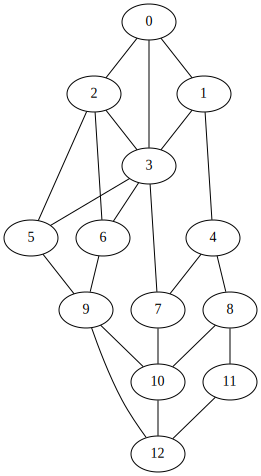

In [ ]:
G1.plot()

In [ ]:
G1.DFS(0)

0 1 3 2 5 9 6 10 7 4 8 11 12 

In [ ]:
G1.BFS(5)

5 2 3 9 0 6 1 7 10 12 4 8 11 

## **Lista de adyacencia:**

In [ ]:
class GraphList:

    def __init__(self) -> None:
        self.n = 0
        self.L: List[List[int]] = []

    def add_vertex(self) -> None:
        self.L.append([])
        self.n += 1

    def add_edge(self, vi: int, vf: int) -> bool:
        if not ((0 <= vi < self.n) and (0 <= vf < self.n)):
            return False
        self.L[vi].append(vf)
        self.L[vi].sort()
        self.L[vf].append(vi)
        self.L[vf].sort()
        return True

    def plot(self) -> "gv.Graph":
        graph = gv.Graph()
        for i in range(self.n):
            graph.node(f'{i}', f'{i}')
        edges = []
        for l, i in zip(self.L, range(self.n)):
            for j in l:
                if not ((i, j) in edges or (j, i) in edges):
                    graph.edge(f'{i}', f'{j}')
                    edges.append((i, j))
        return graph

    def DFS(self, v: int, logs: bool = True) -> None:
        visit = [False] * self.n
        self.__DFS_visit(v, visit, logs)

    def __DFS_visit(self, v: int, visit: List[bool], logs: bool = True) -> List[bool]:
        visit[v] = True
        if logs:
            print(v, end = ' ')
        for vk in self.L[v]:
            if not visit[vk]:
                visit = self.__DFS_visit(vk, visit, logs)
        return visit

    def BFS(self, v: int, logs: bool = True) -> None:
        q = Queue()
        visit = [False] * self.n
        visit[v] = True
        q.put(v)
        while not q.empty():
            v = q.get()
            if logs:
                print(v, end = ' ')
            for vk in self.L[v]:
                if not visit[vk]:
                    visit[vk] = True
                    q.put(vk)

    def degree(self, v: int) -> int:
        pass

    def min_degree(self) -> int:
        return min(self.degree_sequence())

    def max_degree(self) -> int:
        return max(self.degree_sequence())

    def degree_sequence(self) -> List[int]:
        pass

    def number_of_components(self) -> int:
        pass

    def is_connected(self) -> bool:
        return self.number_of_components() == 1

    def path(self, vi: int, vf: int) -> List[int]:
        pass

    def is_eulerian(self) -> bool:
        pass

    def is_semieulerian(self) -> bool:
        pass

    def is_r_regular(self, r: int) -> bool:
        pass

    def is_complete(self) -> bool:
        pass

    def is_acyclic(self) -> bool:
        pass

In [ ]:
G2 = GraphList()

for i in range(13):
    G2.add_vertex()

G2.add_edge(0, 1)
G2.add_edge(0, 2)
G2.add_edge(0, 3)
G2.add_edge(1, 3)
G2.add_edge(1, 4)
G2.add_edge(2, 3)
G2.add_edge(2, 5)
G2.add_edge(2, 6)
G2.add_edge(3, 5)
G2.add_edge(3, 6)
G2.add_edge(3, 7)
G2.add_edge(4, 7)
G2.add_edge(4, 8)
G2.add_edge(5, 9)
G2.add_edge(6, 9)
G2.add_edge(7, 10)
G2.add_edge(8, 10)
G2.add_edge(8, 11)
G2.add_edge(9, 10)
G2.add_edge(9, 12)
G2.add_edge(10, 12)
G2.add_edge(11, 12)

True

In [ ]:
pprint(G2.L)

[[1, 2, 3],
 [0, 3, 4],
 [0, 3, 5, 6],
 [0, 1, 2, 5, 6, 7],
 [1, 7, 8],
 [2, 3, 9],
 [2, 3, 9],
 [3, 4, 10],
 [4, 10, 11],
 [5, 6, 10, 12],
 [7, 8, 9, 12],
 [8, 12],
 [9, 10, 11]]


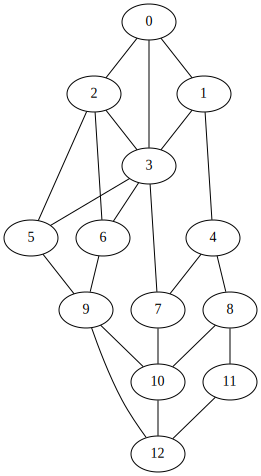

In [ ]:
G2.plot()

In [ ]:
G2.DFS(0)

0 1 3 2 5 9 6 10 7 4 8 11 12 

In [ ]:
G2.BFS(5)

5 2 3 9 0 6 1 7 10 12 4 8 11 